## Regression

##
### Question 1: What is Simple Linear Regression?


**Simple Linear Regression** is a statistical technique used to model the relationship between two continuous variables — one **independent variable (X)** and one **dependent variable (Y)**. It assumes a linear relationship of the form:<br>
[
Y = β₀ + β₁X + ε
]
where:

* ( β₀ ) = intercept,
* ( β₁ ) = slope,
* ( ε ) = error term.
  It helps predict the value of Y based on a given value of X.


##
### Question 2: What are the key assumptions of Simple Linear Regression?

1. **Linearity** – The relationship between X and Y is linear.
2. **Independence** – Observations are independent of each other.
3. **Homoscedasticity** – Constant variance of residuals across all levels of X.
4. **Normality** – Residuals are normally distributed.
5. **No multicollinearity** – (only relevant when multiple predictors are used).


##
### Question 3: What is heteroscedasticity, and why is it important to address in regression models?


**Heteroscedasticity** occurs when the **variance of residuals is not constant** across all levels of the independent variable(s).
It violates the homoscedasticity assumption of regression and leads to:

* **Inefficient estimates** of coefficients.
* **Inaccurate standard errors**, making hypothesis tests unreliable.
  Addressing it ensures valid statistical inference and model reliability.


##
### Question 4: What is Multiple Linear Regression?

**Multiple Linear Regression (MLR)** models the relationship between one dependent variable (Y) and **two or more independent variables** (X₁, X₂, …, Xₙ).
The general form is:<br><br>
[
Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε
]<br><br>
It helps assess how multiple factors collectively influence a single outcome.


##
### Question 5: What is polynomial regression, and how does it differ from linear regression?


**Polynomial Regression** models the relationship between X and Y using **higher-degree terms of X** (e.g., X², X³) to capture curvature.
It differs from simple linear regression, which assumes a **straight-line relationship**.
Example:<br><br>
[
Y = β₀ + β₁X + β₂X² + ε
]<br><br>
Polynomial regression can model **non-linear relationships** between variables.


##
### Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:
* X = [1, 2, 3, 4, 5]
* Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#### Plot the regression line over the data points.


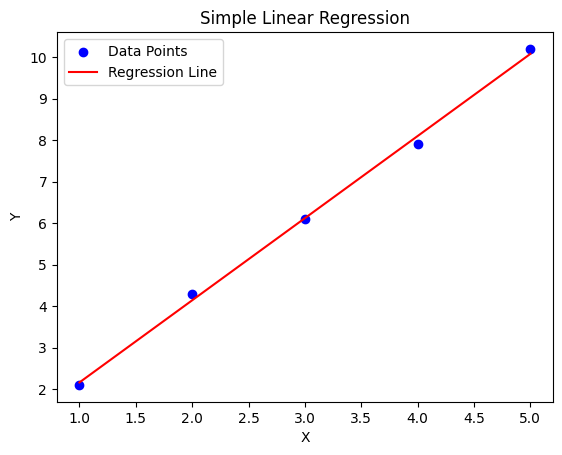

Coefficient: 1.9800000000000004
Intercept: 0.17999999999999794


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Model fitting
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Plot
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

##
### Question 7: Fit a Multiple Linear Regression model on this sample data:
* Area = [1200, 1500, 1800, 2000]
* Rooms = [2, 3, 3, 4]
* Price = [250000, 300000, 320000, 370000]
#### Check for multicollinearity using VIF and report the results.


In [9]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
y = data['Price']

# Add constant for intercept
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print(model.summary())
print("\nVariance Inflation Factor:\n", vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Fri, 17 Oct 2025   Prob (F-statistic):             0.0377
Time:                        16:36:30   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

C:\Users\Ankit Ghosal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


✅ **Interpretation:**

* **High VIF (>5)** indicates **multicollinearity** between predictors.
* If VIF values are low, the model is stable.

##
### Question 8: Implement polynomial regression on the following data:
* X = [1, 2, 3, 4, 5]
* Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#### Fit a 2nd-degree polynomial and plot the resulting curve

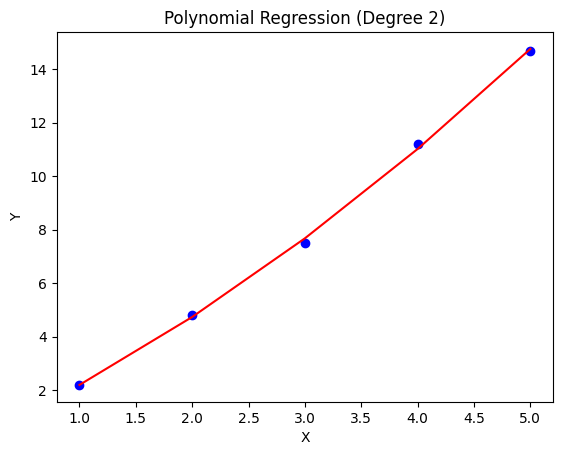

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform to polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

##
### Question 9: Create a residuals plot for a regression model trained on this data:
* X = [10, 20, 30, 40, 50]
* Y = [15, 35, 40, 50, 65]
#### Assess heteroscedasticity by examining the spread of residuals.


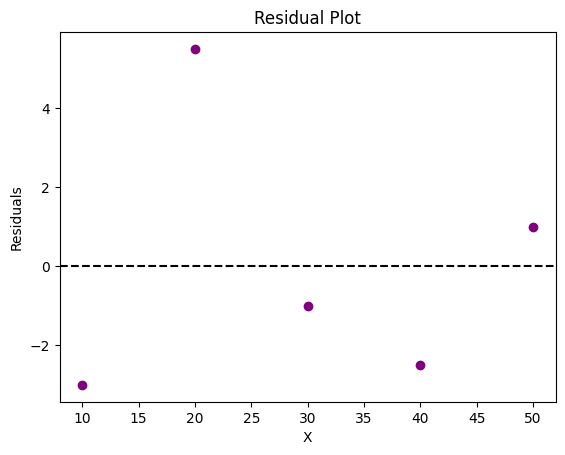

In [11]:
# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
residuals = Y - Y_pred

# Residual plot
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.show()





✅ **Interpretation:**

* If residuals are **randomly scattered**, variance is constant (no heteroscedasticity).
* If residuals **spread out**, heteroscedasticity exists.

##
### Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

To ensure a robust regression model:

**For Heteroscedasticity:**

* Use **log or Box-Cox transformations** on the dependent variable.
* Apply **Weighted Least Squares (WLS)** to handle unequal variance.
* Use **robust standard errors** to adjust variance estimates.

**For Multicollinearity:**

* Examine **VIF values** and remove or combine highly correlated predictors.
* Use **Principal Component Analysis (PCA)** or **Regularization methods** like **Ridge or Lasso Regression**.
* Collect more data or transform variables if feasible.